In [8]:
import os

file_path = r"C:\Users\YourUsername\Downloads\house_price.csv"  # Update the correct path
if os.path.exists(file_path):
    print("✅ File found!")
else:
    print("❌ File NOT found! Check the file name and location.")



❌ File NOT found! Check the file name and location.


In [12]:
import os
print(os.getcwd())  # This is where Python is looking for files




C:\Users\sumol


In [16]:
print(os.listdir(r"C:\Users\sumol"))  # See available folders


['.anaconda', '.conda', '.condarc', '.continuum', '.ipynb_checkpoints', '.ipython', '.jupyter', '.matplotlib', 'abc_company_data.csv', 'anaconda3', 'anaconda_projects', 'AppData', 'Application Data', 'conditional and looping statements.ipynb', 'Contacts', 'Cookies', 'course_catalog.ipynb', 'creating module.ipynb', 'Data structures in python.ipynb', 'Data visualization.ipynb', 'Day 1.ipynb', 'Documents', 'Downloads', 'employee.py', 'Favorites', 'file and exception handling.ipynb', 'house_price.csv', 'Links', 'Local Settings', 'Module 4 Assignment.ipynb', 'Music', 'My Documents', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{5c3b6f08-c590-11ef-b248-64bc588ef369}.TxR.0.regtrans-ms', 'NTUSER.DAT{5c3b6f08-c590-11ef-b248-64bc588ef369}.TxR.1.regtrans-ms', 'NTUSER.DAT{5c3b6f08-c590-11ef-b248-64bc588ef369}.TxR.2.regtrans-ms', 'NTUSER.DAT{5c3b6f08-c590-11ef-b248-64bc588ef369}.TxR.blf', 'NTUSER.DAT{5c3b6f09-c590-11ef-b248-64bc588ef369}.TM.blf', 'NTUSER.DAT{5c3b6f09-c5

In [20]:
os.chdir(r"C:\Users\sumol\Downloads")  # Example if the file is on Desktop
df = pd.read_csv("house_price.csv")


In [22]:
import os

file_path = r"C:\Users\sumol\Downloads\house_price.csv"  # Update with the correct path

if os.path.exists(file_path):
    print("✅ File found!")
    df = pd.read_csv(file_path)
else:
    print("❌ File NOT found! Check the file location.")


✅ File found!


In [24]:
import pandas as pd

file_path = r"C:\Users\sumol\Downloads\house_price.csv"  # Update with correct path

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())


                   location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0            3699  
1            4615  
2            4305  
3            6245  
4            4250  


In [26]:
# Check dataset structure
print(df.info())

# Display summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB
None
         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%     1100.000000      2.0

In [28]:
mean = df['price_per_sqft'].mean()
std_dev = df['price_per_sqft'].std()

# Define outlier threshold (values beyond 3 standard deviations)
lower_bound = mean - (3 * std_dev)
upper_bound = mean + (3 * std_dev)

# Remove outliers
df = df[(df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound)]



In [30]:
lower_limit = df['price_per_sqft'].quantile(0.05)  # 5th percentile
upper_limit = df['price_per_sqft'].quantile(0.95)  # 95th percentile

df = df[(df['price_per_sqft'] >= lower_limit) & (df['price_per_sqft'] <= upper_limit)]


In [32]:
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

df = df[(df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound)]



In [34]:
from scipy import stats

df['z_score'] = stats.zscore(df['price_per_sqft'])
df = df[(df['z_score'] > -3) & (df['z_score'] < 3)]  # Keeping values within 3 standard deviations
df.drop(columns=['z_score'], inplace=True)



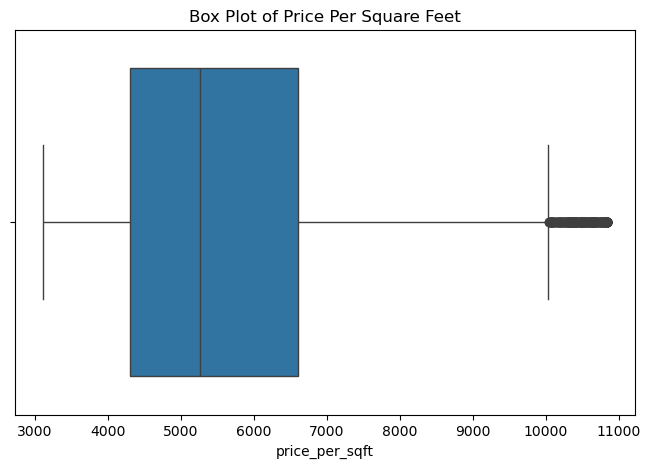

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['price_per_sqft'])
plt.title("Box Plot of Price Per Square Feet")
plt.show()



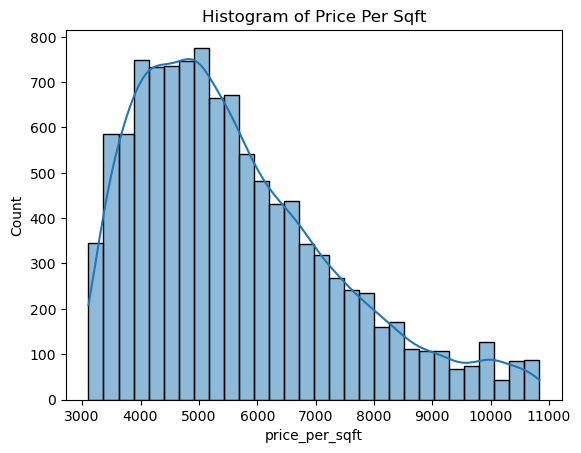

In [39]:
sns.histplot(df['price_per_sqft'], kde=True, bins=30)
plt.title("Histogram of Price Per Sqft")
plt.show()


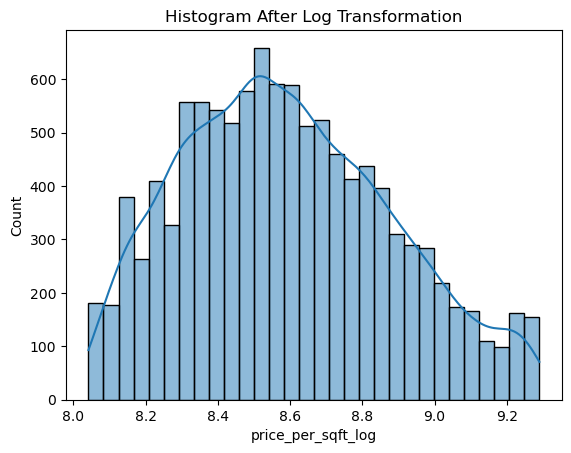

In [41]:
import numpy as np

df['price_per_sqft_log'] = np.log(df['price_per_sqft'])

sns.histplot(df['price_per_sqft_log'], kde=True, bins=30)
plt.title("Histogram After Log Transformation")
plt.show()


In [43]:
from scipy.stats import skew, kurtosis

print("Skewness before:", skew(df['price_per_sqft']))
print("Kurtosis before:", kurtosis(df['price_per_sqft']))

print("Skewness after:", skew(df['price_per_sqft_log']))
print("Kurtosis after:", kurtosis(df['price_per_sqft_log']))


Skewness before: 0.9092589675990197
Kurtosis before: 0.34766510465466594
Skewness after: 0.3137707286754954
Kurtosis after: -0.5815811951226317


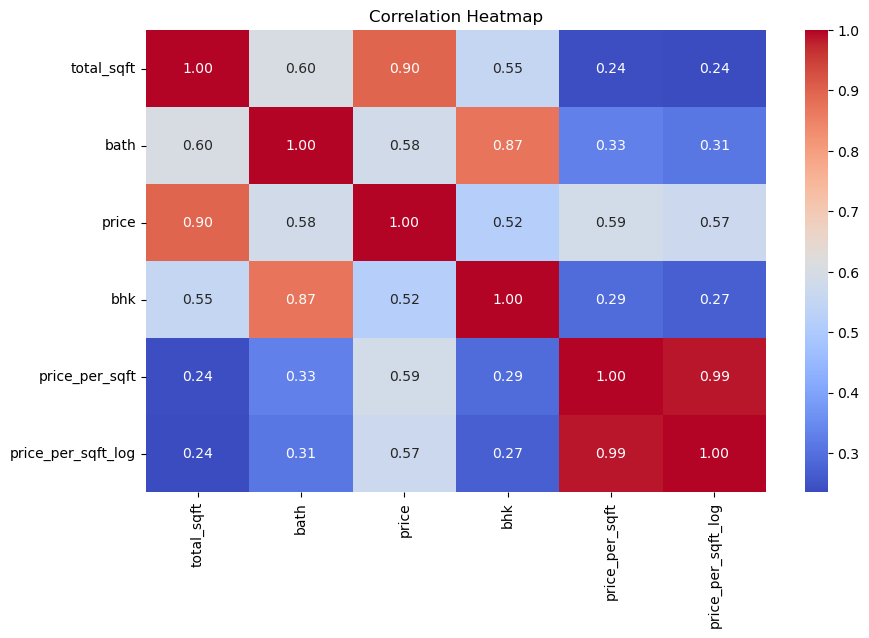

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numeric_df = df.select_dtypes(include=['number'])

# Check correlation
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()



In [49]:
print(df.dtypes)  # Check column data types
print(df.isnull().sum())  # Check missing values



location               object
size                   object
total_sqft            float64
bath                  float64
price                 float64
bhk                     int64
price_per_sqft          int64
price_per_sqft_log    float64
dtype: object
location              0
size                  0
total_sqft            0
bath                  0
price                 0
bhk                   0
price_per_sqft        0
price_per_sqft_log    0
dtype: int64


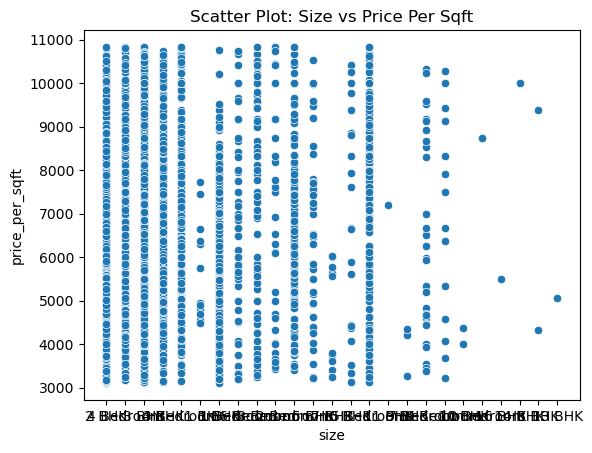

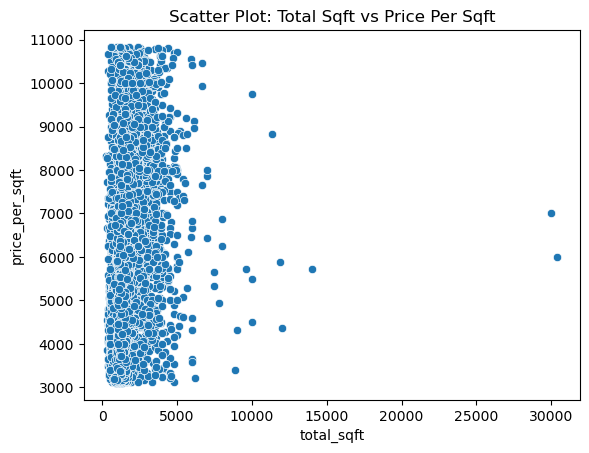

In [53]:
sns.scatterplot(x=df['size'], y=df['price_per_sqft'])
plt.title("Scatter Plot: Size vs Price Per Sqft")
plt.show()

sns.scatterplot(x=df['total_sqft'], y=df['price_per_sqft'])
plt.title("Scatter Plot: Total Sqft vs Price Per Sqft")
plt.show()




In [55]:
df.to_csv("cleaned_house_price.csv", index=False)
print("✅ Cleaned dataset saved successfully!")



✅ Cleaned dataset saved successfully!
